# 1. Import libraries

In [75]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime
import matplotlib.dates as mdates
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [76]:
# Creat path
path = r'D:\ドキュメント\Study\CareerFoundry\Achievement 6'

# 2. Import dataset

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','vehicle loan customer_cleansed.csv'))

In [4]:
df.columns = [i.lower() for i in df.columns]
df.columns = [i.replace('.','_') for i in df.columns]

In [5]:
df = df.dropna()

# 3. EDA

In [6]:
def age(dob):
    yr = int(dob.split('-')[2])
    if yr >=0 and yr < 21:
        return yr + 2000
    else:
         return yr + 1900
        
df['date_of_birth'] = df['date_of_birth'].apply(age)
df['disbursaldate'] = df['disbursaldate'].apply(age)
# Age of the customer at the time of disbursement of fund
df['age'] = df['disbursaldate'] - df['date_of_birth']

In [12]:
df['age'].value_counts(sort=True)

23    10418
24    10389
26    10281
28    10005
22     9972
25     9874
27     9269
30     9129
29     8806
31     8558
32     8336
33     7829
34     7406
35     7074
36     6950
38     6729
21     6708
37     6105
40     5837
43     5573
39     5563
42     5529
41     5267
44     4601
45     4426
46     4332
48     4026
47     3686
49     3115
50     3066
51     2512
53     2376
52     2237
54     1753
55     1551
56     1464
58     1223
57     1163
59      813
60      615
61      408
62      330
63      167
64       21
20        1
Name: age, dtype: int64

In [8]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data','plus_age.csv'))

In [14]:
defaulter = df[df['loan_default']==True]

In [17]:
pd.set_option('display.max_columns', 50)

In [18]:
defaulter.head()

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,date_of_birth,employment_type,disbursaldate,state_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,primary_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,age
1,537409,47145,65550,73.23,67,1985,Self employed,2018,6,True,True,False,False,False,False,598,I-Medium Risk,1,1,1,27600,50200,50200,1991,0,1,1yrs 11mon,1yrs 11mon,0,True,33
3,624493,57513,66113,88.48,67,1993,Self employed,2018,6,True,True,False,False,False,False,305,L-Very High Risk,3,0,0,0,0,0,31,0,0,0yrs 8mon,1yrs 3mon,1,True,25
4,539055,52378,60300,88.39,67,1977,Self employed,2018,6,True,True,False,False,False,False,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,True,41
10,548567,53278,61230,89.83,67,1979,Self employed,2018,6,True,True,False,False,False,False,300,M-Very High Risk,1,0,0,0,0,0,2270,0,0,0yrs 7mon,0yrs 7mon,0,True,39
12,478647,53278,61330,89.68,67,1974,Salaried,2018,6,True,False,False,True,False,False,300,M-Very High Risk,7,2,1,0,69900,69900,3300,0,0,1yrs 3mon,2yrs 9mon,0,True,44


# 4. Regresasion Analysis

In [19]:
over200 = defaulter[defaulter['perform_cns_score']>200]

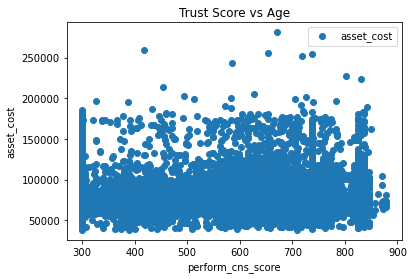

In [77]:
over200.plot(x = 'perform_cns_score', y='asset_cost',style='o')
plt.title('Trust Score vs Age')  
plt.xlabel('perform_cns_score')  
plt.ylabel('asset_cost')  
plt.show()

In [78]:
X = over200['perform_cns_score'].values.reshape(-1,1)
y = over200['asset_cost'].values.reshape(-1,1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [80]:
regression = LinearRegression() 

In [81]:
regression.fit(X_train, y_train)

LinearRegression()

In [82]:
y_predicted = regression.predict(X_test)

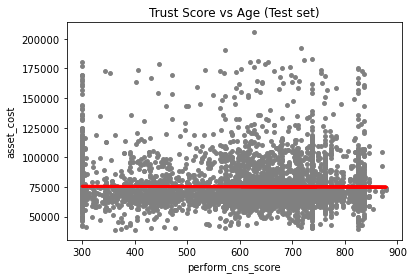

In [83]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Trust Score vs Age (Test set)')
plot_test.xlabel('perform_cns_score')
plot_test.ylabel('asset_cost')
plot_test.show()

In [30]:
over200.to_csv(os.path.join(path, '02 Data','Prepared Data','over200.csv'))

C:\Users\kenta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


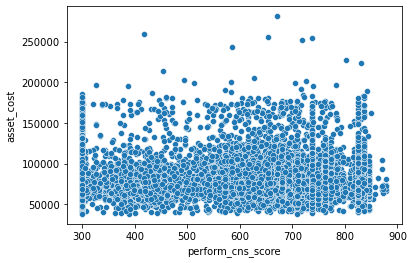

In [84]:
sns.scatterplot(over200['perform_cns_score'], over200['asset_cost'])
plt.show()

In [85]:
sub = over200[['perform_cns_score', 'asset_cost']]

In [86]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [87]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]

score

[-7008024213752.401,
 -2684012703658.695,
 -1422014483406.2886,
 -856354109564.5149,
 -628133851713.4657,
 -465440317168.0945,
 -367012358195.2725,
 -297694113244.32904,
 -242546247859.60077]

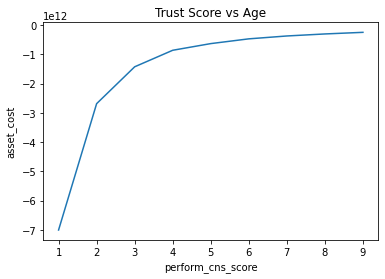

In [88]:
pl.plot(num_cl,score)
pl.xlabel('perform_cns_score')
pl.ylabel('asset_cost')
pl.title('Trust Score vs Age')
pl.show()

In [89]:
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [90]:
kmeans.fit(sub)

C:\Users\kenta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [91]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\kenta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-91-97c7b350e8f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [92]:
sub.head()

,perform_cns_score,asset_cost,clusters
1,598,65550,0
3,305,66113,0
10,300,61230,0
12,300,61330,0
13,738,57010,0


In [93]:
sub['clusters'].value_counts()

0    16703
1     3136
2      487
Name: clusters, dtype: int64

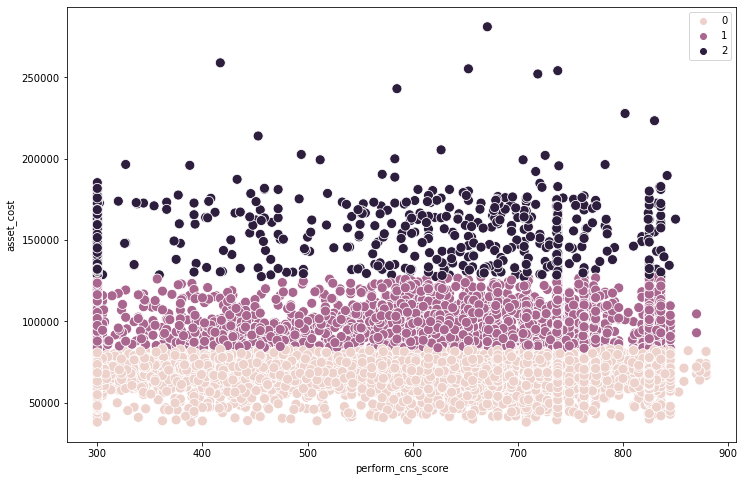

In [106]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['perform_cns_score'], y=sub['asset_cost'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('perform_cns_score') 
plt.ylabel('asset_cost') 

plt.savefig(os.path.join(path, '04 Analysis','Visualizations','kmeas.jpg'))
plt.show()